In [1]:
# Step 4: Load the dataset
import pandas as pd

# Load CSV (make sure the file name matches your folder)
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Quick peek at first 5 rows
df.head()


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [2]:
# Check target distribution and columns
print("Columns:", df.columns.tolist())
print("\nAttrition value counts:")
print(df['Attrition'].value_counts())
print("\nAny missing values?", df.isna().sum().sum())


Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Attrition value counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Any missing values? 0


In [3]:
# Map target: Yes → 1 (will leave), No → 0 (stays)
df['target'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Quick check
df[['Attrition', 'target']].head()


Attrition  target
0       Yes       1
1        No       0
2       Yes       1
3        No       0
4        No       0

In [4]:
# Small feature list
features = [
    'Age', 
    'DistanceFromHome', 
    'MonthlyIncome', 
    'TotalWorkingYears',
    'YearsAtCompany', 
    'YearsInCurrentRole', 
    'JobSatisfaction',
    'EnvironmentSatisfaction', 
    'WorkLifeBalance'
]

# Convert OverTime to numeric 0/1
df['OverTime_flag'] = (df['OverTime'] == 'Yes').astype(int)
features.append('OverTime_flag')

# Feature matrix and target
X = df[features]
y = df['target']

# Quick peek
X.head()


Age  DistanceFromHome  MonthlyIncome  TotalWorkingYears  YearsAtCompany  \
0   41                 1           5993                  8               6   
1   49                 8           5130                 10              10   
2   37                 2           2090                  7               0   
3   33                 3           2909                  8               8   
4   27                 2           3468                  6               2   

   YearsInCurrentRole  JobSatisfaction  EnvironmentSatisfaction  \
0                   4                4                        2   
1                   7                2                        3   
2                   0                3                        4   
3                   7                3                        4   
4                   2                2                        1   

   WorkLifeBalance  OverTime_flag  
0                1              1  
1                3              0  
2                3              1  
3                3              1  
4                3              0

In [5]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,       # 20% test
    random_state=42,     # for reproducibility
    stratify=y           # keep class balance
)

# Check shapes and target distribution
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Train positive rate:", y_train.mean())
print("Test positive rate:", y_test.mean())


X_train shape: (1176, 10)
X_test shape: (294, 10)
Train positive rate: 0.16156462585034015
Test positive rate: 0.1598639455782313


In [6]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize logistic regression with class balancing
lr = LogisticRegression(max_iter=5000, class_weight='balanced', solver='saga')

# Train the model
lr.fit(X_train, y_train)

# Predict probabilities on test set
y_test_proba = lr.predict_proba(X_test)[:, 1]

# Compute basic metric: AUC
auc = roc_auc_score(y_test, y_test_proba)
print(f"Baseline Logistic Regression AUC: {auc:.4f}")


Baseline Logistic Regression AUC: 0.6288


C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

y_test_proba_lr = log_reg.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_test_proba_lr)

print(f"Logistic Regression AUC: {auc_lr:.4f}")


Logistic Regression AUC: 0.7773


C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
def recall_topk(y_true, y_proba, topk=0.2):
    n = len(y_true)
    k = int(n * topk)
    top_idx = np.argsort(y_proba)[-k:]
    y_top = np.array(y_true)[top_idx]
    recall = y_top.sum() / y_true.sum()
    return recall

recall_lr = recall_topk(y_test, y_test_proba_lr)
print(f"Logistic Regression Recall@Top20%: {recall_lr:.3f}")


Logistic Regression Recall@Top20%: 0.574


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)
rf.fit(X_train, y_train)

y_test_proba_rf = rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_test_proba_rf)

print(f"Random Forest AUC: {auc_rf:.4f}")


Random Forest AUC: 0.7780


In [10]:
recall_rf = recall_topk(y_test, y_test_proba_rf)
print(f"Random Forest Recall@Top20%: {recall_rf:.3f}")


Random Forest Recall@Top20%: 0.489


In [11]:
import pandas as pd

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10)


MonthlyIncome              0.179900
Age                        0.149449
TotalWorkingYears          0.144502
YearsAtCompany             0.105044
OverTime_flag              0.103989
DistanceFromHome           0.092867
EnvironmentSatisfaction    0.071142
YearsInCurrentRole         0.052826
WorkLifeBalance            0.050614
JobSatisfaction            0.049667
dtype: float64

In [12]:
import shap

# Create explainer for Random Forest
explainer = shap.Explainer(rf, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)


C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


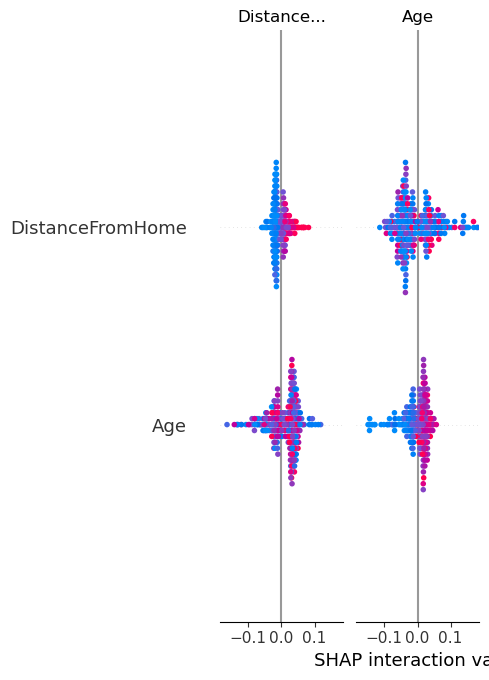

In [13]:
shap.summary_plot(shap_values, X_test)


In [14]:
# Explain the first employee in the test set
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0])


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [15]:
import shap

shap.initjs()
shap.plots.force(explainer.expected_value, shap_values[0], X_test.iloc[0])


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [16]:
shap.plots.force(explainer.expected_value[0], shap_values[0,:,0], X_test.iloc[0])


ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [17]:
import shap

# Create an Explanation object for the first test instance
expl = shap.Explanation(
    values=shap_values[0],      # shap values for the first instance
    base_values=explainer.expected_value,  # expected value(s)
    data=X_test.iloc[0]         # feature values for this instance
)

# Visualize
shap.initjs()
shap.plots.force(expl)


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [18]:
import shap

shap.initjs()

# Single instance
shap.plots.force(
    explainer.expected_value[0],   # base value for the first output
    shap_values[0],                # SHAP values for the first instance
    X_test.iloc[0]                 # feature values for the first instance
)


ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [19]:
import shap

# Make sure shap_values is an Explanation object
shap_vals_array = shap_values.values  # get the NumPy array
expected_val = explainer.expected_value[0]  # for single-output
instance = X_test.iloc[0]  # first row


In [20]:
shap.initjs()
shap.plots.force(
    expected_val,      # scalar base value
    shap_vals_array[0],  # first instance, as array
    instance           # features of first instance
)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [21]:
import shap
shap.initjs()

# shap_values.values has shape (n_samples, n_features) or (n_samples, n_features, n_outputs)
# For single-output, pick first output if needed

shap_vals_array = shap_values.values  # full array
expected_val = explainer.expected_value  # scalar for single-output

# Take first instance and reshape to 2D
single_shap = shap_vals_array[0].reshape(1, -1)  # shape (1, n_features)
single_instance = X_test.iloc[0].to_frame().T      # make it 2D as well

shap.plots.force(
    expected_val, 
    single_shap, 
    single_instance
)


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [23]:
import shap
shap.initjs()

# pick the second class (positive class, e.g., 'Attrition=Yes')
base_value = explainer.expected_value[1]        # scalar
single_shap = shap_values.values[0, :, 1]       # first instance, second class
single_instance = X_test.iloc[0]               # can stay 1D here

# now plot
shap.plots.force(
    base_value,
    single_shap,
    single_instance
)


In [24]:
X_train['tenure_ratio'] = X_train['YearsInCurrentRole'] / (X_train['YearsAtCompany'] + 0.1)
X_test['tenure_ratio'] = X_test['YearsInCurrentRole'] / (X_test['YearsAtCompany'] + 0.1)


In [25]:
X_train['engagement_index'] = X_train[['JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance']].mean(axis=1)
X_test['engagement_index'] = X_test[['JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance']].mean(axis=1)


In [26]:
median_hike = X_train['PercentSalaryHike'].median()
X_train['overtime_low_hike'] = X_train['OverTime_flag'] * (X_train['PercentSalaryHike'] < median_hike).astype(int)
X_test['overtime_low_hike'] = X_test['OverTime_flag'] * (X_test['PercentSalaryHike'] < median_hike).astype(int)


KeyError: 'PercentSalaryHike'

In [27]:
X_train.columns


Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'WorkLifeBalance', 'OverTime_flag',
       'tenure_ratio', 'engagement_index'],
      dtype='object')

In [28]:
# Assuming X_train indices match df
X_train['PercentSalaryHike'] = df.loc[X_train.index, 'PercentSalaryHike']
X_test['PercentSalaryHike'] = df.loc[X_test.index, 'PercentSalaryHike']


In [29]:
median_hike = X_train['PercentSalaryHike'].median()
X_train['overtime_low_hike'] = X_train['OverTime_flag'] * (X_train['PercentSalaryHike'] < median_hike).astype(int)
X_test['overtime_low_hike'] = X_test['OverTime_flag'] * (X_test['PercentSalaryHike'] < median_hike).astype(int)


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

# Custom scorer for Recall@Top20%
def recall_topk_scorer(y_true, y_proba):
    n = len(y_true)
    k = int(n*0.2)
    top_idx = np.argsort(y_proba)  # ascending
    top_idx = top_idx[-k:]
    y_top = np.array(y_true)[top_idx]
    return y_top.sum() / y_true.sum()

scorer = make_scorer(recall_topk_scorer, needs_proba=True)

# Grid search parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(rf, param_grid, scoring=scorer, cv=3)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)


C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\metrics\_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                  

Best params: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [31]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

# Custom scorer for Recall@Top20%
def recall_topk_scorer(y_true, y_proba):
    # Get positive class probabilities
    y_score = y_proba[:, 1]  # assuming binary classification
    n = len(y_true)
    k = max(1, int(n * 0.2))  # top 20%
    
    # Indices of top k probabilities
    top_idx = np.argsort(y_score)[-k:]
    
    # Count how many true positives are in the top k
    y_top = np.array(y_true)[top_idx]
    return y_top.sum() / y_true.sum()

scorer = make_scorer(recall_topk_scorer, needs_proba=True)

# Grid search parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(rf, param_grid, scoring=scorer, cv=3)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)


C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\metrics\_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\metrics\_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                  

Best params: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [33]:
import numpy as np
from sklearn.metrics import make_scorer

# Custom scorer for Recall@Top20%
def recall_topk_scorer(y_true, y_proba, **kwargs):
    # y_proba may be shape (n_samples, 2) for binary classification
    if y_proba.ndim == 2 and y_proba.shape[1] == 2:
        y_proba = y_proba[:, 1]  # take probability of positive class

    n = len(y_true)
    k = int(n * 0.2)
    top_idx = np.argsort(y_proba)  # ascending order
    top_idx = top_idx[-k:]
    y_top = np.array(y_true)[top_idx]
    return y_top.sum() / y_true.sum()

scorer = make_scorer(recall_topk_scorer, needs_proba=True)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Your custom scorer
scorer = make_scorer(recall_topk_scorer, needs_proba=True)

# Example model & param grid
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100],
    'max_depth': [4],
    'min_samples_split': [2]
}

grid = GridSearchCV(rf, param_grid, scoring=scorer, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
# Get best model
best_rf = grid.best_estimator_

# Retrain on full training set
best_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, random_state=42)

In [36]:
y_test_proba = best_rf.predict_proba(X_test)[:, 1]


In [37]:
from sklearn.metrics import roc_auc_score

# AUC
auc = roc_auc_score(y_test, y_test_proba)
print(f"Tuned Random Forest AUC: {auc:.4f}")

# Recall@Top20%
def recall_topk(y_true, y_proba, topk=0.2):
    n = len(y_true)
    k = int(n*topk)
    top_idx = np.argsort(y_proba)[-k:]
    y_top = np.array(y_true)[top_idx]
    return y_top.sum() / y_true.sum()

recall = recall_topk(y_test, y_test_proba)
print(f"Tuned Random Forest Recall@Top20%: {recall:.3f}")


Tuned Random Forest AUC: 0.7897
Tuned Random Forest Recall@Top20%: 0.489


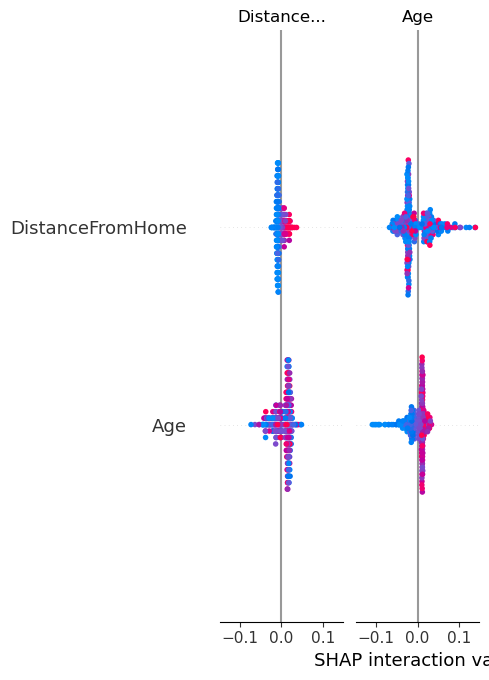

In [38]:
import shap

explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [39]:
# First employee in test set
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0])


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [40]:
import shap

# Enable JS visualization
shap.initjs()

# For the first test sample
shap.plots.force(
    explainer.expected_value[1],  # expected value for the positive class
    shap_values.values[0],        # SHAP values for the first sample
    X_test.iloc[0]                # feature values for the first sample
)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [41]:
import shap
import numpy as np

shap.initjs()

# For the first test sample
shap.plots.force(
    explainer.expected_value,                  # expected value (single-output or binary)
    np.array([shap_values.values[0]]),        # wrap in extra dimension
    X_test.iloc[[0]]                           # keep as DataFrame with one row
)


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [42]:
shap.initjs()

# positive class = index 1
shap.plots.force(
    explainer.expected_value[1],      # expected value for class 1
    shap_values.values[:, 1][0],      # SHAP values for first sample, class 1
    X_test.iloc[0]                     # features for first sample
)


DimensionError: Length of features is not equal to the length of shap_values!

In [43]:
shap.plots.force(
    explainer.expected_value[1],
    shap_values.values[0:1, 1],  # shape (1, n_features)
    X_test.iloc[[0]]              # shape (1, n_features)
)


DimensionError: Length of features is not equal to the length of shap_values!

In [44]:
shap.initjs()

# For the first test sample, positive class
shap.plots.force(
    base_value=explainer.expected_value[1],   # expected value for class 1
    shap_values=shap_values.values[0, :, 1],  # all features for first sample, class 1
    features=X_test.iloc[0]                   # first row as Series
)


In [45]:
# Use your trained model (Random Forest or Logistic Regression)
y_test_proba = best_rf.predict_proba(X_test)[:, 1]  # probability of leaving


In [46]:
import numpy as np

def recall_top20(y_true, y_proba, top_percent=0.2):
    n = len(y_true)
    k = int(n * top_percent)  # top 20%
    # Get indices of top k predicted probabilities
    top_idx = np.argsort(y_proba)[-k:]
    # Count how many actual leavers are in the top k
    y_top = np.array(y_true)[top_idx]
    recall = y_top.sum() / y_true.sum()  # fraction of total leavers captured
    return recall

recall = recall_top20(y_test, y_test_proba)
print(f"Recall@Top20%: {recall:.3f}")


Recall@Top20%: 0.489


In [47]:
X_train['tenure_ratio'] = X_train['YearsInCurrentRole'] / (X_train['YearsAtCompany'] + 0.1)
X_test['tenure_ratio'] = X_test['YearsInCurrentRole'] / (X_test['YearsAtCompany'] + 0.1)


In [48]:
X_train['engagement_index'] = X_train[['JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance']].mean(axis=1)
X_test['engagement_index'] = X_test[['JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance']].mean(axis=1)


In [49]:
median_hike = X_train['PercentSalaryHike'].median()
X_train['overtime_low_hike'] = X_train['OverTime_flag'] * (X_train['PercentSalaryHike'] < median_hike).astype(int)
X_test['overtime_low_hike'] = X_test['OverTime_flag'] * (X_test['PercentSalaryHike'] < median_hike).astype(int)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42,
    class_weight='balanced'  # handles class imbalance
)

# Train on train set with new features
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=200,
                       random_state=42)

In [51]:
y_test_proba = rf.predict_proba(X_test)[:, 1]  # probability of leaving


In [52]:
def recall_topk(y_true, y_proba, top_percent=0.2):
    n = len(y_true)
    k = int(n * top_percent)
    top_idx = np.argsort(y_proba)[-k:]
    y_top = np.array(y_true)[top_idx]
    recall = y_top.sum() / y_true.sum()
    return recall

recall = recall_topk(y_test, y_test_proba)
print(f"Random Forest Recall@Top20% with engineered features: {recall:.3f}")


Random Forest Recall@Top20% with engineered features: 0.468


In [53]:
auc = roc_auc_score(y_test, y_test_proba)
print(f"Random Forest AUC with engineered features: {auc:.4f}")


Random Forest AUC with engineered features: 0.7586


In [54]:
from sklearn.metrics import make_scorer
import numpy as np

def recall_topk_scorer(y_true, y_proba, top_percent=0.2):
    n = len(y_true)
    k = int(n * top_percent)
    top_idx = np.argsort(y_proba)[-k:]
    y_top = np.array(y_true)[top_idx]
    recall = y_top.sum() / y_true.sum()
    return recall

# Make scorer for GridSearchCV
scorer = make_scorer(recall_topk_scorer, needs_proba=True)


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')


In [56]:
grid = GridSearchCV(rf, param_grid, scoring=scorer, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)


C:\Users\USER\anaconda3\envs\attrition\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [57]:
best_rf = grid.best_estimator_

# Predict probabilities
y_test_proba = best_rf.predict_proba(X_test)[:, 1]

# Recall@Top20%
recall = recall_topk_scorer(y_test, y_test_proba)
print(f"Tuned Random Forest Recall@Top20%: {recall:.3f}")

# AUC (secondary metric)
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_test_proba)
print(f"Tuned Random Forest AUC: {auc:.4f}")


Tuned Random Forest Recall@Top20%: 0.511
Tuned Random Forest AUC: 0.7673


In [58]:
import shap

# Create explainer for the tuned Random Forest
explainer = shap.Explainer(best_rf, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)


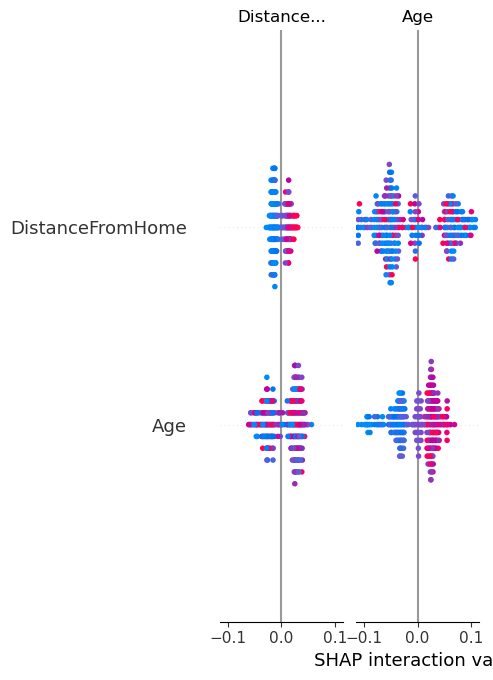

In [59]:
shap.summary_plot(shap_values, X_test)


In [60]:
# Show SHAP for first employee in test set
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0])


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [61]:
import shap

# Initialize JS for interactive plots
shap.initjs()

# Single employee (e.g., first row of test set)
shap.plots.force(explainer.expected_value, shap_values[0], X_test.iloc[0])


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [62]:
import shap

# Initialize JS for interactive plots
shap.initjs()

# Single employee index
i = 0

# Correct force plot for binary classification
shap.plots.force(
    base_value=explainer.expected_value[1],   # index 1 for positive class
    shap_values=shap_values.values[i][1],     # index 1 for positive class
    features=X_test.iloc[i],
    feature_names=X_test.columns
)


DimensionError: Length of features is not equal to the length of shap_values!

In [63]:
import shap

# Initialize JS for interactive plots
shap.initjs()

# Single employee (e.g., first row of test set)
i = 0

# This works in SHAP v0.20+ for binary classification
shap.plots.force(shap_values[i])


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [64]:
import shap

# Initialize JS for interactive plots
shap.initjs()

# Single employee index
i = 0  # first row in test set

# Use the SHAP object properly for binary classification
shap.plots.force(
    base_value=shap_values.base_values[i][1],  # expected value for positive class
    shap_values=shap_values.values[i][1],      # SHAP values for positive class
    features=X_test.iloc[i],
    feature_names=X_test.columns
)


DimensionError: Length of features is not equal to the length of shap_values!

In [65]:
import shap

# Initialize JS
shap.initjs()

# First employee
i = 0

# Waterfall plot (better than force for presentation)
shap.plots.waterfall(shap_values[i])


ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (14, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [66]:
import shap

# Initialize JS
shap.initjs()

# First employee
i = 0

# Waterfall plot for positive class (class 1)
shap.plots.waterfall(shap_values[i,1])


TypeError: only length-1 arrays can be converted to Python scalars

In [67]:
import shap

# Initialize JS for interactive plots
shap.initjs()

# Pick first employee
i = 0

# Extract SHAP explanation for the positive class (Attrition=Yes)
single_exp = shap_values[i].values[:,1]       # SHAP values for class 1
base_value = shap_values.base_values[i,1]    # expected value for class 1
features = X_test.iloc[i]                    # feature values

# Use legacy force_plot (works for one employee)
shap.force_plot(base_value, single_exp, features)
